# AiDM 2019 Group 26: Assignment 3: Structure of Wikipedia Links

## Part 2: Exploratory data analysis (eda)

Auke Bruinsma, s1594443 and Simon van Wageningen, s2317079.

### 1. Imports.

In [1]:
# Packages.
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Datasets
data = pd.read_csv("preprocessed_data.csv",sep = ",",)

### 2. Questions to answer.

1. **Dead ends**: Find nodes with no outgoing edges. How many have you found?
2. **Distribution of in-degrees**: For every node compute the number of incoming edges.
3. **Distribution of out-degrees**: For every node compute the number of outgoing edges.
4. **Nice & informative plots**: Make nice & informative plots of both distributions.
5. **Average out- and in-degree**: What is the average out-degree and the average in-degree of the graph?

#### 2.1. **Dead ends**: Find nodes with no outgoing edges. How many have you found?

We computed this already in the first part of the assignent (in the prep.ipynb file), because it is the difference of the unique_tot variable and the unique_from variable. We will compute it again here, in a different way however.

In [3]:
num_out_edges = len(np.unique(data['page_id_from']))
unique_values = np.max(data['page_id_from'])

print('Number pages with outgoing edges:       {0}'.format(num_out_edges))
print('Number of total pages:                  {0}'.format(unique_values))
print('Number of pages without outgoing edges: {0}'.format(unique_values-num_out_edges))

Number pages with outgoing edges:       230824
Number of total pages:                  248192
Number of pages without outgoing edges: 17368


#### 2.2. **Distribution of in-degrees**: For every node compute the number of incoming edges.

In [4]:
page_in,occ_in = np.unique(data['page_id_to'],return_counts=True)

# Quick overview.
for i in range(5):
    print(page_in[i],occ_in[i])

0 210
1 55
2 90
3 98
4 430


So, there are 210 pages that lead to page 0, 55 pages that lead to page 1, etc....

#### 2.3. **Distribution of out-degrees**: For every node compute the number of outgoing edges.

In [5]:
page_out,occ_out = np.unique(data['page_id_from'],return_counts=True)

# Quick overview.
for i in range(5):
    print(page_out[i],occ_out[i])

0 193
1 21
2 22
3 61
4 47


So there are 193 pages reachable from page 0, 21 to go to from page 1, etc...

#### 2.4. **Nice & informative plots**: Make nice & informative plots of both distributions.

Plotting the number of incoming and outgoing edges for each node is undoable, since that are around 250.000 data points, that's too much and won't be informative. Instead we are going to plot the number of pages that only lead to 0,1,2... other pages. So we will give a bar plot that shows how many pages there are that lead to exactly 1 other page, how many pages there are that only have 1 other page to lead to them, etc... We won't be doing this for all cases because that is still too much. We will do it for the first 50, because then the curve really stars dropping off, see the graphs.

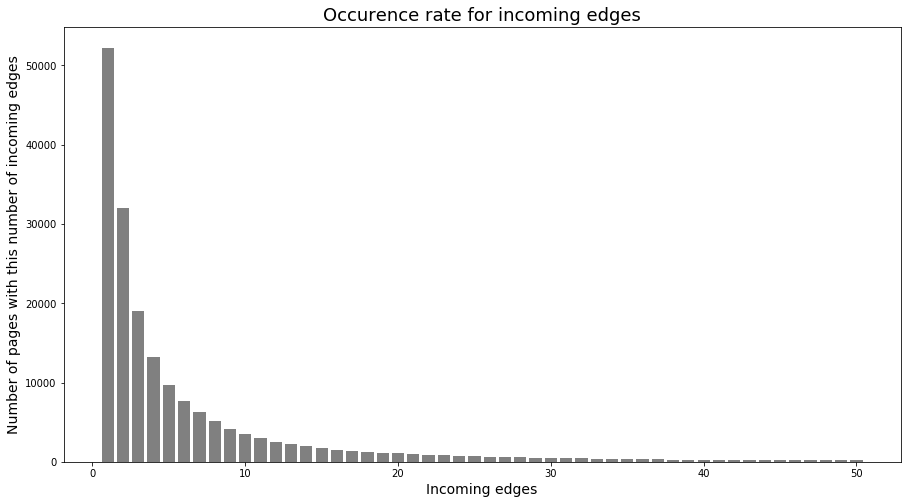

In [6]:
b=50
incoming,num_pages_in = np.unique(occ_in,return_counts=True)
plt.figure(figsize=(15,8))
plt.bar(incoming[0:b],num_pages_in[0:b],color='gray')
plt.title('Occurence rate for incoming edges',fontsize=18)
plt.xlabel('Incoming edges',fontsize=14)
plt.ylabel('Number of pages with this number of incoming edges',fontsize=14)
plt.show();
plt.close()

**Comment**: This curve is far more perfect than the outcoming edge graph. There are approximately $50.000$ pages that have one other page leading to them, $30.000$ pages that have two other pages leading to them and it gradually decreases with increasing number of pages.

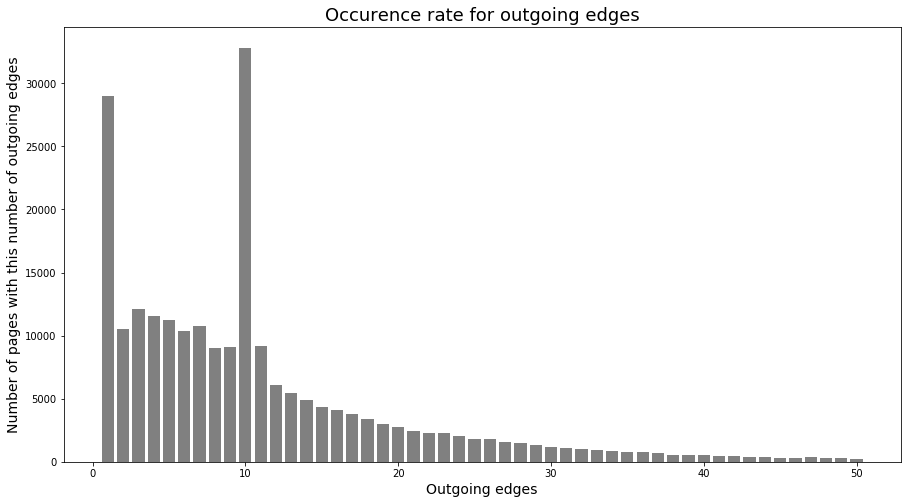

In [7]:
outgoing,num_pages_out = np.unique(occ_out,return_counts=True)
plt.figure(figsize=(15,8))
plt.bar(outgoing[0:b],num_pages_out[0:b],color='gray')
plt.title('Occurence rate for outgoing edges',fontsize=18)
plt.xlabel('Outgoing edges',fontsize=14)
plt.ylabel('Number of pages with this number of outgoing edges',fontsize=14)
plt.show();
plt.close()

**Comment**: There's one thing that stands out; apparently there are more than $30.000$ pages that lead to 10 other pages. The curve gradually decreases almost perfect with each subsequent number having less pages than the one before, which is expected off course, but apparently 10 is an exception.

We will also plot the pages with the most incoming and outgoing edges, to give an overview of the numbers and distribution.

In [8]:
sort_occ_in = np.sort(occ_in)
sort_occ_out = np.sort(occ_out)

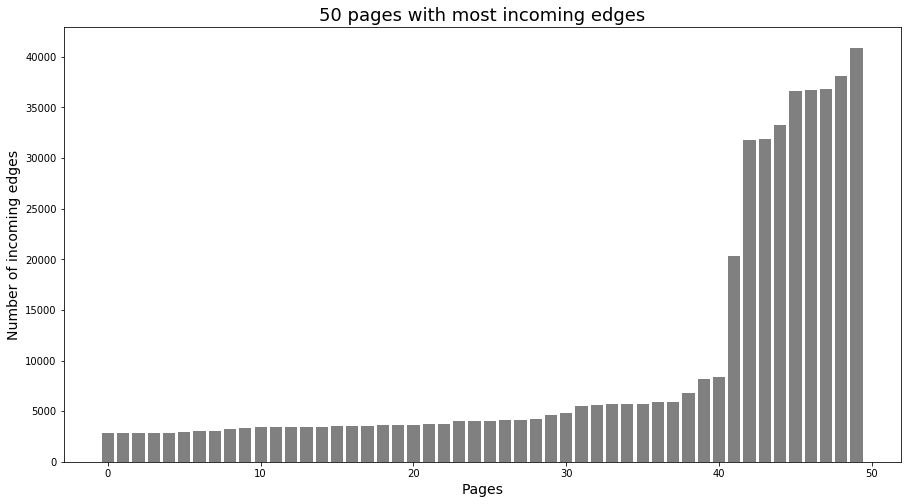

In [9]:
plt.figure(figsize=(15,8))
plt.bar(np.arange(b),sort_occ_in[-1-b:-1],color='gray')
plt.title('{0} pages with most incoming edges'.format(b),fontsize=18)
plt.xlabel('Pages',fontsize=14)
plt.ylabel('Number of incoming edges',fontsize=14)
plt.show();
plt.close()

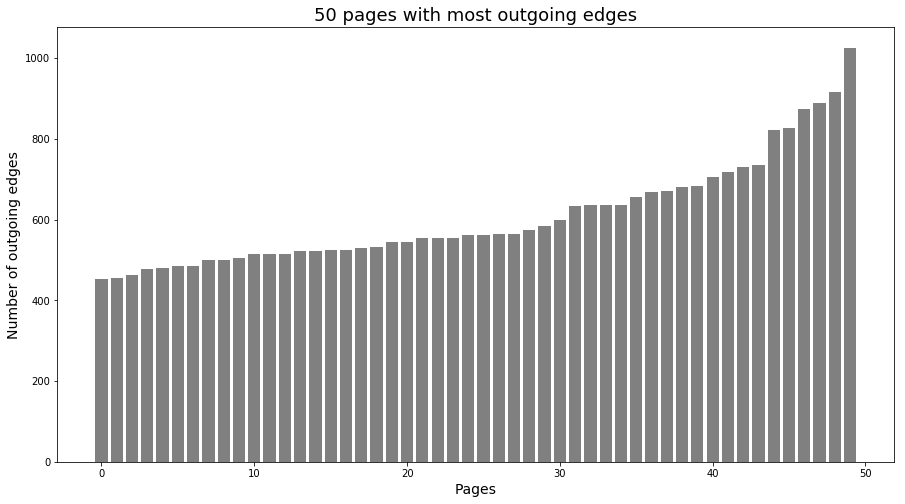

In [10]:
plt.figure(figsize=(15,8))
plt.bar(np.arange(b),sort_occ_out[-1-b:-1],color='gray')
plt.title('{0} pages with most outgoing edges'.format(b),fontsize=18)
plt.xlabel('Pages',fontsize=14)
plt.ylabel('Number of outgoing edges',fontsize=14)
plt.show();
plt.close()

**Comment**: Few things stand out: (1) The distribution for outgoing edges is more equally distributed and has lower values. (2) The distribution for incoming edges has more extreme values. This means there are a couple of pages which are referenced extremely often, while there are no pages which refer to an extreme number of pages. This makes sense.

#### 2.5. **Average out- and in-degree**: What is the average out-degree and the average in-degree of the graph?

In [11]:
avg_in = np.average(occ_in)
avg_out = np.average(occ_out)

print('Average in-degree:  {0:.3}'.format(avg_in))
print('Average out-degree: {0:.3}'.format(avg_out))

Average in-degree:  16.5
Average out-degree: 13.7


So an average page has ~13.7 pages which lead to the page, and ~16.5 other pages it leads to.

### 3. Estimate RAM requirements.

1. How much RAM would you need to store the transition matrix $M$ and the inital vector $v$ in RAM? Assume double precision (64 bits per number).
2. The same question assuming that you store $M$ in a sparse matrix (in RAM)?
3. The same question, assuming that you use data structures as described on slide 17.

#### 3.1. How much RAM would you need to store the transition matrix $M$ and the inital vector $v$ in RAM? Assume double precision (64 bits per number).

There are 64 bits per number, so 8 bytes per matrix element. The width and height of the matrix are both equal to the number of unique pages. The vector $v$ has as much elements as the number of unique pages. So the total can be computed in the following way:

In [12]:
n_b = 8*(unique_values*(unique_values+1))
n_gb = n_b/1024**3

print('RAM: {0:.5} GB'.format(n_gb))

RAM: 458.95 GB


#### 3.2. The same question assuming that you store $M$ in a sparse matrix (in RAM)?


Now you only have as much elements as there are connections between nodes:

In [13]:
n_b = 8*(len(data)+unique_values)
n_mb_1 = n_b/1024**2

print('RAM: {0:.4} MB'.format(n_mb_1))
print('\nData reduction factor w.r.t. question 3.1: {0:.5g}'.format(n_gb*1024/n_mb_1))

RAM: 26.08 MB

Data reduction factor w.r.t. question 3.1: 18018


#### 3.3. The same question, assuming that you use data structures as described on slide 17.

The data structure van slide 17 bestaat uit 3 lists, 1e list RAM: len(source_nodes_list)*64 / 8, 2e list RAM: len(degree_list)*64 /8. 3e list moet nog platgemaakt worden en dan de len() daarvan

The data structure from slide 17 consists of 3 lists:
1. The first list is the number of source nodes which equals the number of unique_values.
2. The second list is the out degree list, which has the same size as the first list.
3. The third list is the children of the node list, which has as much data points as the data array.

The RAM size can then be computed in the following way:

In [14]:
n_b = 8*(len(data)+2*unique_values)
n_mb_2 = n_b/1024**2

print('RAM: {0:.4} MB'.format(n_mb_2))
print('\nData reduction factor w.r.t. question 3.1: {0:.5g}'.format(n_gb*1024/n_mb_2))

RAM: 27.98 MB

Data reduction factor w.r.t. question 3.1: 16798
